Predicting the outcome of the drugs that might be accurate for a patient

Data Preprocessing

### NAME: EMMANUEL DEBRAH
### DEPT: FPEN
### ASSIGNMENT: 3

In [ ]:
#1. Preprocess data by applying all concepts covered including
#  -dealing with empty values
#  -Handling categorical and non-numeric values(use any type of encoding)
#  -Generate few plots; bar and pie plots using any features but should include both single and multivariate plots.

#2. drop one feature if two features have a correlation greater than 0.9


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
dataset = pd.read_csv("Drug_data.csv")
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [89]:
# Count the number of unique values in the species column

unique_count = dataset['BP'].nunique()
print("Number of unique elements:", unique_count)

Number of unique elements: 3


In [90]:
element_counts = dataset['BP'].value_counts()

print(element_counts)

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


Text(0.5, 1.0, 'CHART OF RANGES OF BP')

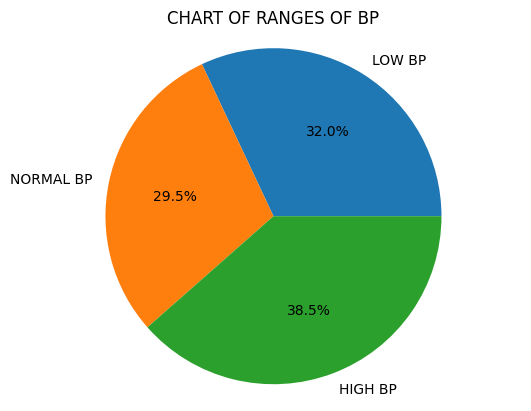

In [91]:
labels = ['LOW BP', 'NORMAL BP', 'HIGH BP']
sizes = [64, 59, 77]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('CHART OF RANGES OF BP')

In [112]:
element_counts = dataset['Cholesterol'].value_counts()

print(element_counts)

0    103
1     97
Name: Cholesterol, dtype: int64


Text(0.5, 1.0, 'CHART OF RANGES OF CHOLESTEROL')

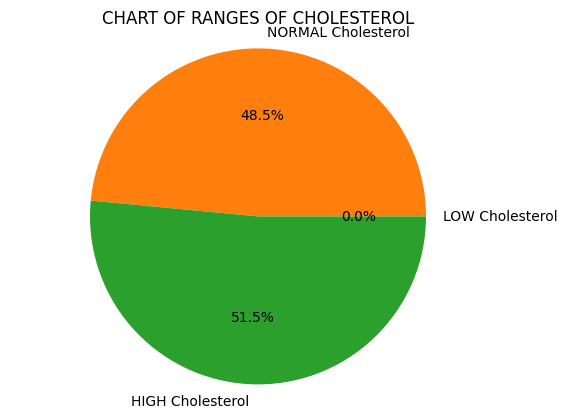

In [115]:
labels = ['LOW Cholesterol', 'NORMAL Cholesterol', 'HIGH Cholesterol']
sizes = [0, 97, 103]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('CHART OF RANGES OF CHOLESTEROL')

In [92]:
dataset.shape

(200, 6)

In [93]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [94]:
#  dealing with empty values
dataset.info() #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
#  Handling categorical and non-numeric values(use any type of encoding)
rerun = LabelEncoder()

dataset['Sex'] = rerun.fit_transform(dataset['Sex'])
dataset['BP'] = rerun.fit_transform(dataset['BP'])
dataset['Cholesterol'] = rerun.fit_transform(dataset['Cholesterol'])
dataset['Drug'] = rerun.fit_transform(dataset['Drug'])

dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


Model building

In [97]:
dataset.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


<Axes: ylabel='Drug'>

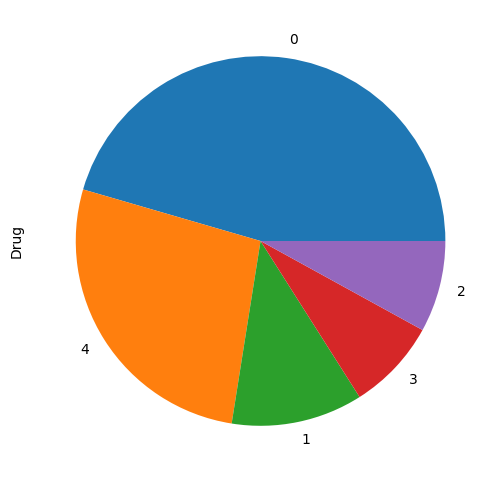

In [98]:
dataset['Drug'].value_counts().plot(kind='pie', figsize=(6,6))

In [99]:
#Split data into target feature and independent features(check meta-data)
target_feature = 'Drug'
independent_feature = ['Age','Sex','BP','Cholesterol','Na_to_K']
X= dataset[independent_feature]
y= dataset[target_feature]
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [101]:
#train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
random_state = 42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (160, 5)
X_test shape: (40, 5)
y_train shape: (160,)
y_test shape: (40,)


In [102]:
# perform Feature Scaling using codes below
from sklearn.preprocessing import StandardScaler  #import library
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

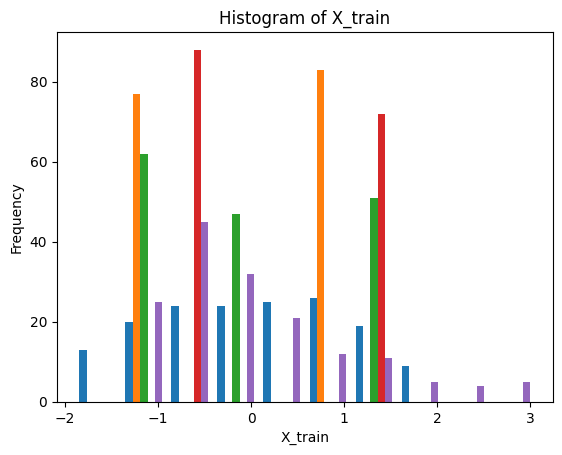

In [103]:
#visualise scaled data
plt.hist(X_train, bins=10)
plt.xlabel('X_train')
plt.ylabel('Frequency')
plt.title('Histogram of X_train')
plt.show()


Training a logistic regression classifier

In [104]:
from sklearn.linear_model import LinearRegression
# Make predictions on the Test set
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train[[4]])
print(y_pred)

[1.18980246]


In [105]:
from sklearn.linear_model import LinearRegression


In [107]:
# Fit a Logistic Regression model to the Training set
import LogisticRegression from sklearn.linear_model
#fit training data to LogisticRegression()

SyntaxError: invalid syntax (3730626266.py, line 2)

In [108]:
#Training a Support vector machine classifier
# Make predictions on the Test set

from sklearn.svm import SVC
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the StandardScaler and fit/transform the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and fit the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Now, the SVM classifier is trained on the scaled training data.
# You can use it for predictions on the test set, e.g., X_test.

# Make predictions on the test set
X_test_scaled = scaler.transform(X_test)  # Scale the test data using the same scaler
y_pred = svm_classifier.predict(X_test_scaled)
y_pred

array([4, 0, 4, 3, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 3, 0, 2, 4,
       4, 0, 0, 0, 3, 4, 0, 4, 0, 3, 3, 0, 1, 0, 4, 1, 0, 1])

In [ ]:
#Training a random forest classifier
# Make predictions on the Test set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_classifier.fit(X_train, y_train)

# Now, the Random Forest Classifier is trained on the training data.
# You can use it for predictions on the test set, e.g., X_test.

# Make predictions on the test set
y_pred = random_forest_classifier.predict(X_test)
y_pred